## Fashion MNIST 데이터셋 분석 보고서

### 1. 개요
- Fashion MNIST 데이터셋 소개

Fashion MNIST 데이터셋은 운동화, 셔츠, 샌들과 같은 작은 이미지들의 모음이며, 기본 MNIST 데이터셋과 같이 열 가지로 분류될 수 있는 28 X 28 픽셀의 이미지 70,000개로 이루어져 있다. 그 중 60,000개는 학습용 데이터, 10,000개는 테스트용 데이터이다.

In [1]:
from torchvision import datasets, transforms

"""
    ** transforms.ToTensor()
    이미지를 텐서 형식으로 변환하고 [0, 255] 범위의 픽셀 값을 [0, 1] 범위로 스케일링한다.
"""
transform = transforms.Compose([
    transforms.ToTensor()
])

# Fashion MNIST 데이터셋 로드
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# 훈련 데이터와 테스트 데이터 크기 출력
print("훈련 데이터 크기:", len(train_dataset))
print("테스트 데이터 크기:", len(test_dataset))

훈련 데이터 크기: 60000
테스트 데이터 크기: 10000


### 2. 데이터셋 구성 및 특성
- 클래스 라벨링<br>
Fashion MNIST 데이터셋은 클래스에 대한 이름 정보를 제공하지 않으므로 코드에서 직접 클래스 이름을 정의해야 한다.<br>
이를 통해 데이터셋 분석 과정에서 숫자 레이블 대신 아이템 이름을 사용하여, 코드의 가독성을 높인다.

In [2]:
# 클래스 이름 정의
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

- 클래스 분포도

In [3]:
import numpy as np

# 레이블 값 추출 (0~9 범위의 클래스 번호)
train_labels = train_dataset.targets.numpy()

# 고유한 레이블과 클래스별 이미지 수 확인
unique_labels, counts = np.unique(train_labels, return_counts=True)
class_distribution = dict(zip(unique_labels, counts))

print("훈련 데이터 클래스별 이미지 수:")
for label, count in class_distribution.items():
    print(f"클래스 {label} ({class_names[label]}): {count}개")


훈련 데이터 클래스별 이미지 수:
클래스 0 (T-shirt/top): 6000개
클래스 1 (Trouser): 6000개
클래스 2 (Pullover): 6000개
클래스 3 (Dress): 6000개
클래스 4 (Coat): 6000개
클래스 5 (Sandal): 6000개
클래스 6 (Shirt): 6000개
클래스 7 (Sneaker): 6000개
클래스 8 (Bag): 6000개
클래스 9 (Ankle boot): 6000개


- 데이터 형식 및 차원

In [4]:
print("훈련 데이터셋 이미지 형태:", train_dataset.data.shape)  
print("훈련 데이터셋 레이블 형태:", train_dataset.targets.shape)
print("테스트 데이터셋 이미지 형태:", test_dataset.data.shape)  
print("테스트 데이터셋 레이블 형태:", test_dataset.targets.shape)

훈련 데이터셋 이미지 형태: torch.Size([60000, 28, 28])
훈련 데이터셋 레이블 형태: torch.Size([60000])
테스트 데이터셋 이미지 형태: torch.Size([10000, 28, 28])
테스트 데이터셋 레이블 형태: torch.Size([10000])



- 훈련 데이터셋 이미지 형태: `torch.Size([60000, 28, 28])`
  - `60000`: 훈련 데이터셋에 포함된 총 이미지 개수이다.
  - `28, 28`: 각 이미지의 크기가 28x28 픽셀임을 의미한다. 이는 Fashion MNIST의 이미지가 고정된 28x28 크기의 흑백 이미지라는 것을 나타낸다.
  - 따라서 `torch.Size([60000, 28, 28])`은 **60000개의 28x28 흑백 이미지로 구성된 데이터셋**을 의미한다.

- 훈련 데이터셋 레이블 형태: `torch.Size([60000])`
  - `60000`: 훈련 데이터셋에 포함된 레이블의 총 개수로, 60000개의 이미지 각각에 해당하는 라벨이 있다.
  - `torch.Size([60000])`은 **60000개의 1차원 레이블 배열**을 의미하며, 각 레이블은 해당 이미지의 클래스(0에서 9 사이의 정수)를 나타낸다.

- 테스트 데이터셋 이미지 형태: `torch.Size([10000, 28, 28])`
  - `10000`: 테스트 데이터셋에 포함된 총 이미지 개수이다.
  - `28, 28`: 테스트 이미지의 크기 역시 28x28 픽셀로 고정된 크기이다.
  - 이 결과는 **10000개의 28x28 흑백 이미지로 구성된 테스트 데이터셋**을 의미한다.

- 테스트 데이터셋 레이블 형태: `torch.Size([10000])`
  - `10000`: 테스트 데이터셋에 포함된 레이블의 총 개수로, 각 이미지에 해당하는 클래스 라벨이 있다.
  - `torch.Size([10000])`은 **10000개의 1차원 레이블 배열**을 의미하며, 각 레이블은 0에서 9 사이의 정수이다.


### 3. 클래스별 이미지 예시

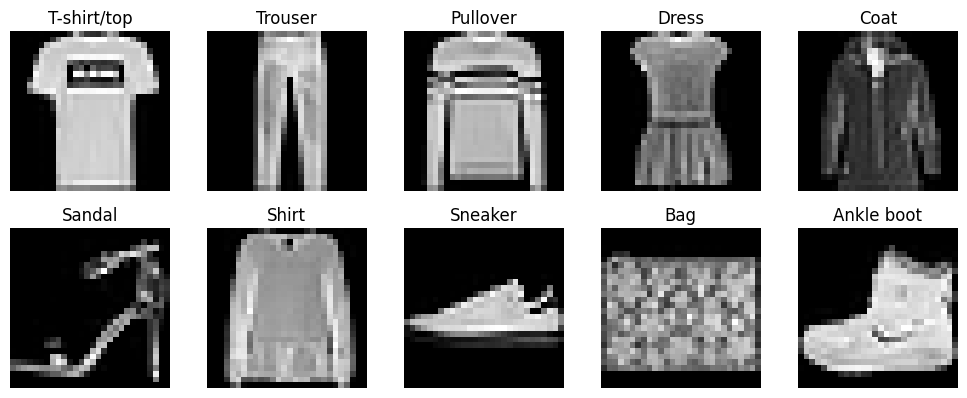

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(10):
    """
        - train_labels에서 특정 클래스 i에 해당하는 인덱스를 찾는다.
        - (train_labels == i)는 NumPy 배열에서 클래스 i에 해당하는 레이블의 인덱스를 찾는다.
        - np.nonzero()는 조건에 맞는 모든 인덱스를 반환하며, [0][0]을 사용하여 첫 번째 해당 인덱스를 선택한다.
    """
    idx = (train_labels == i).nonzero()[0][0].item()  # 첫 번째 인덱스 선택

    image, label = train_dataset[idx]                 # train_dataset[idx]를 통해 idx 인덱스에 해당하는 이미지와 레이블을 가져옴
    plt.subplot(5, 5, i + 1)                          # 5행 5열의 배열로 나누기 때문에, 각 subplot은 (10 / 5) X (10 / 5) = 2인치 X 2인치 크기
    plt.imshow(image.squeeze(), cmap='gray')          # image.squeeze()를 사용해 이미지의 불필요한 차원을 제거하여 2차원으로 변환
    plt.title(class_names[label])
    plt.axis('off')                                   # 이미지를 깔끔하게 표시하기 위해 축을 숨김

plt.tight_layout()      # 여백을 조정하여 이미지가 겹치지 않도록 함
plt.show()